In [1]:
from reduction import *
from utils import *

data_maps = {1: image_reduction(1), 2: image_reduction(2)}

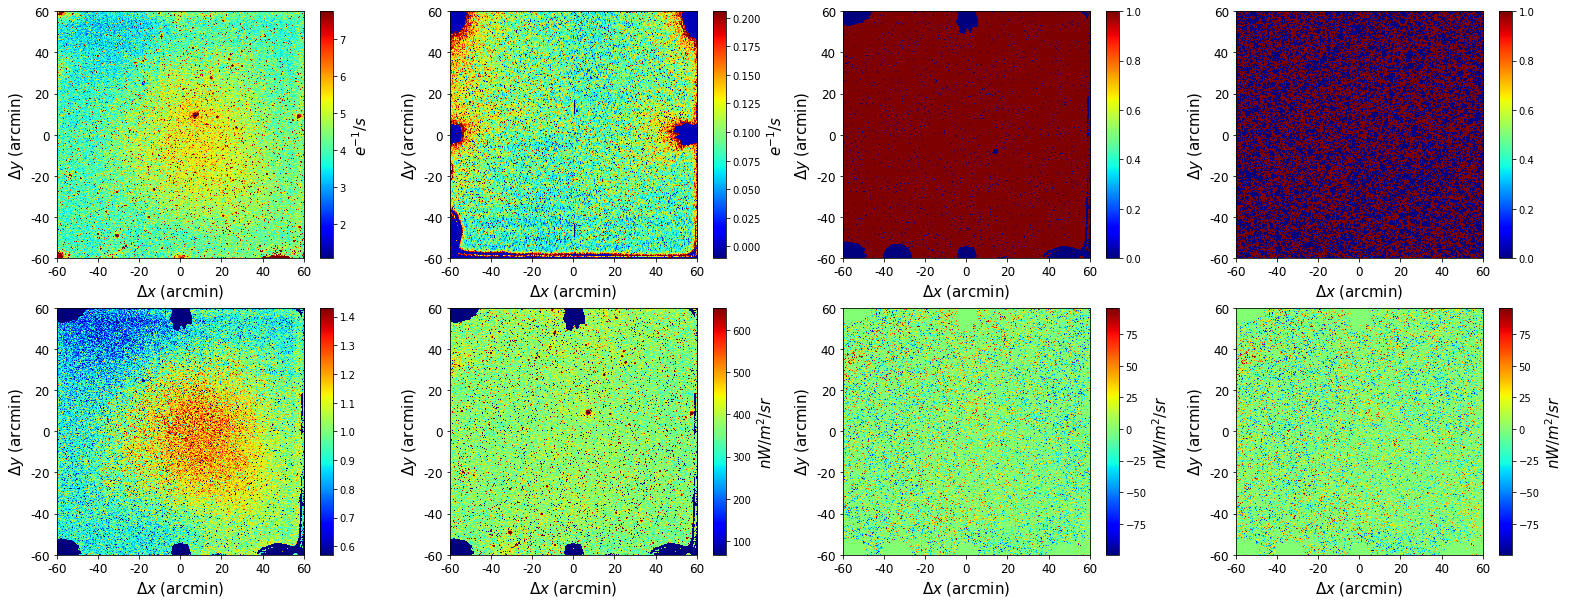

In [12]:
from utils_plotting import *
pixticks = np.linspace(0,1023,7)
pixtick_labels = ['-60', '-40', '-20', '0', '20', '40', '60']

for ifield in [4,5,6,7,8]:
    for inst in [1,2]:
        apf2eps = cal_factor_dict['apf2eps'][inst]
        apf2nWpm2psr = cal_factor_dict['apf2nWpm2psr'][inst][ifield]
        rawmap, mask_inst, mapin, cbmap, strmask, FF\
        = load_processed_images(data_maps, [(inst,ifield,'rawmap'),
                                           (inst,ifield,'mask_inst'),
                                            (inst,ifield,'map'),
                                           (inst,ifield,'cbmap'),
                                           (inst,ifield,'strmask'),
                                           (inst,ifield,'FF')],
                               rotate_TM2=True)
        plt.close()
        fig, ax = plt.subplots(2, 4, figsize = (27,10))
        axi = ax[0][0]
        p = imageclip(rawmap*apf2eps, ax=axi, return_objects=True)
        p['cbar'].ax.set_ylabel('$e^{-1}/s$', rotation=90, fontsize=15)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
        
        axi = ax[0][1]
        p = imageclip(data_maps[inst].DCtemplate*apf2eps, ax=axi, return_objects=True)
        p['cbar'].ax.set_ylabel('$e^{-1}/s$', rotation=90, fontsize=15)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        axi = ax[0][2]
        p = imageclip(mask_inst, ax=axi, return_objects=True)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
        
        axi = ax[0][3]
        p = imageclip(strmask, ax=axi, return_objects=True)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        axi = ax[1][0]
        p = imageclip(FF, ax=axi, return_objects=True)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
        
        axi = ax[1][2]
        p = imageclip(cbmap*mask_inst*strmask, ax=axi, return_objects=True)
        p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        axi = ax[1][3]
        filtmap = image_poly_filter(cbmap, strmask*mask_inst, degree=2)
        p = imageclip(filtmap*mask_inst*strmask, ax=axi, 
                      vmin=p['vmin'], vmax=p['vmax'],return_objects=True)
        p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        axi = ax[1][1]
        meanmap = np.mean(mapin[mask_inst*strmask==1])*apf2nWpm2psr
        p = imageclip(mapin*apf2nWpm2psr, ax=axi,
                      vmin=3*p['vmin']+meanmap, vmax=3*p['vmax']+meanmap,return_objects=True)
        p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        plt.savefig('plots/paperfig/maps_TM%d_%s.png'%(inst, fieldnamedict[ifield]),
                    dpi = 200, bbox_inches='tight')

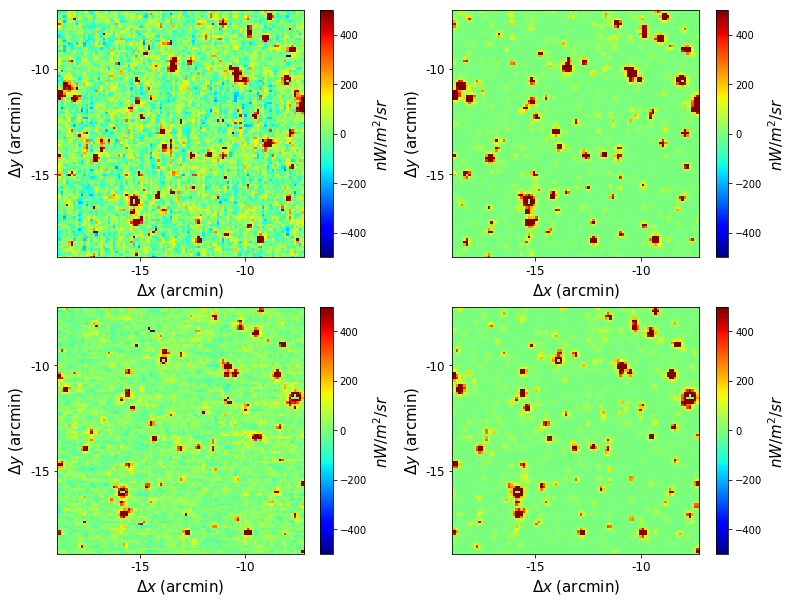

In [8]:
from utils_plotting import *

fig, ax = plt.subplots(2, 2, figsize = (13,10))

pixticks1 = np.linspace(0,511.5,13)
pixtick_labels1 = ['-60', '-55', '-50', '-45', '-40', '-35', 
                  '-30', '-25', '-20', '-15', '-10', '-5', '0']

ifield = 8
for inst in [1,2]:
    mask_inst, cbmap, psmap\
    = load_processed_images(data_maps, [(inst,ifield,'mask_inst'),
                                       (inst,ifield,'cbmap'),
                                       (inst,ifield,'psmap')],
                           rotate_TM2=True)
    axi = ax[inst-1][0]
    p = imageclip(cbmap*mask_inst, vmin=-500, vmax=500, ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks1)
    axi.set_xticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks1)
    axi.set_yticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlim([350,450])
    axi.set_ylim([350,450])
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

    axi = ax[inst-1][1]
    p = imageclip(psmap*mask_inst, vmin=-500, vmax=500, ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks1)
    axi.set_xticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks1)
    axi.set_yticklabels(pixtick_labels1, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
    axi.set_xlim([350,450])
    axi.set_ylim([350,450])
# plt.savefig('plots/paperfig/srcmap.png', dpi = 200, bbox_inches='tight')

In [2]:
from utils_plotting import *
from stack import *

## stacking maps

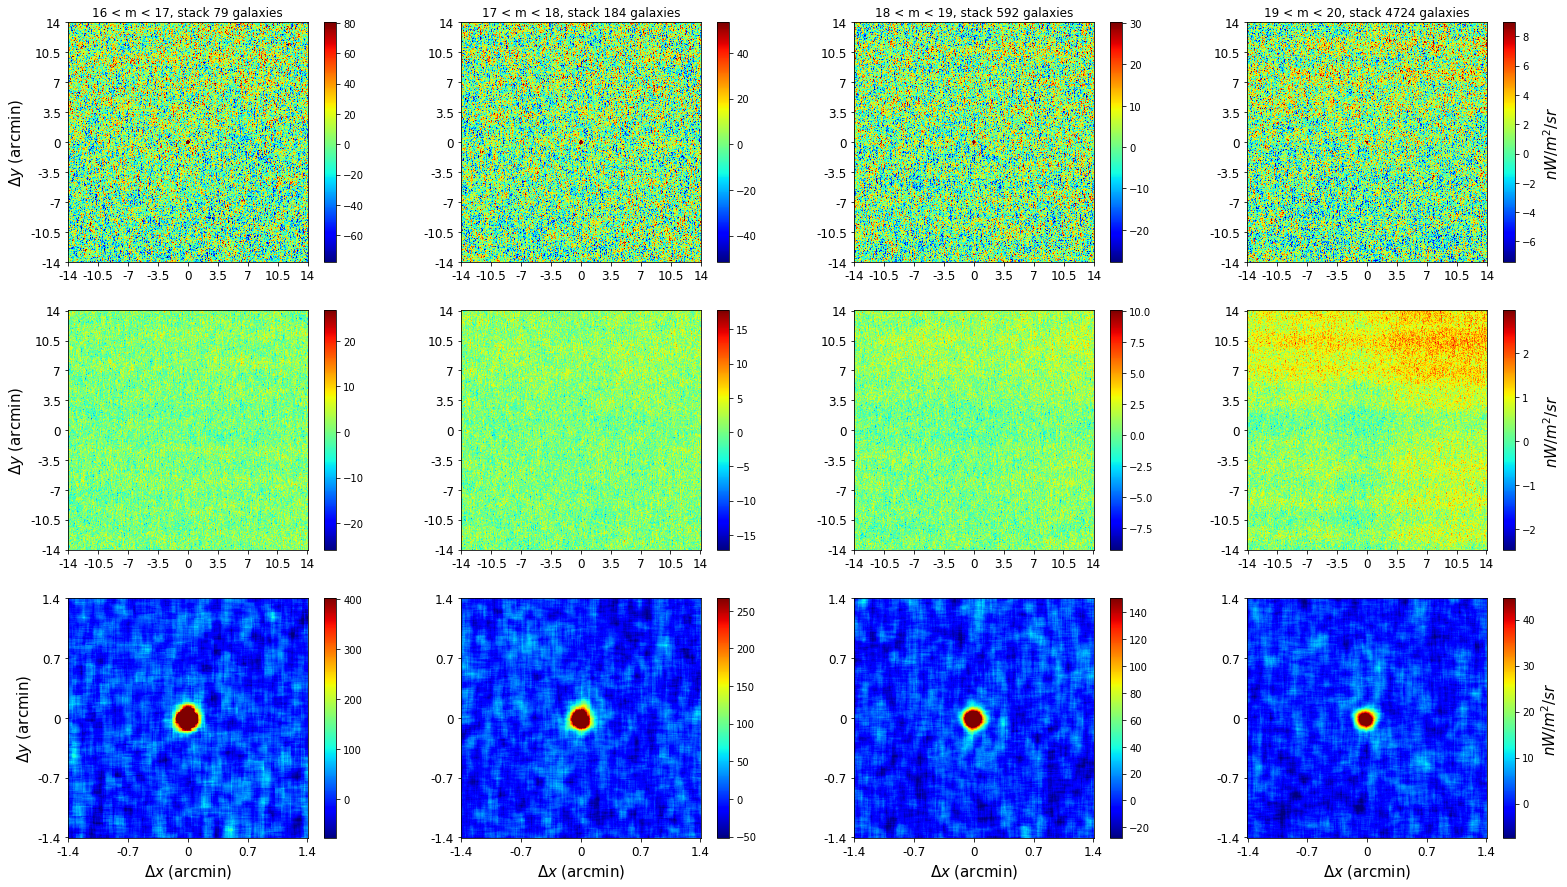

In [3]:
pixticks = np.linspace(0,2400,9)
pixtick_labels = ['-14', '-10.5', '-7', '-3.5', '0', '3.5', '7', '10.5', '14']

for ifield in [4]:#[4,5,6,7,8]:
    for inst in [1]:#[1,2]:
        plt.close()
        fig, ax = plt.subplots(3, 4, figsize = (27,15))
        for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
            stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True).stackdat

            axi = ax[0][im]
            stackmap = stackdat['cbmapstack']
            if inst==2:
                stackmap = np.rot90(stackmap, k=3)
            p = imageclip(stackmap, ax=axi, return_objects=True)
            if im==3:
                p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
            axi.set_xticks(pixticks)
            axi.set_xticklabels(pixtick_labels, fontsize=12)
            axi.set_yticks(pixticks)
            axi.set_yticklabels(pixtick_labels, fontsize=12)
            if im==0:
                axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
            axi.set_title('%d < m < %d, stack %d galaxies'%(m_min, m_max, stackdat['Nsrc']))
            vmin, vmax = p['vmin'], p['vmax']

            axi = ax[1][im]
            stackmap = stackdat['cbmapstackBG']
            if inst==2:
                stackmap = np.rot90(stackmap, k=3)

            p = imageclip(stackmap, ax=axi, 
                          vmin=vmin/3, vmax=vmax/3, return_objects=True)
            if im==3:
                p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
            axi.set_xticks(pixticks/10)
            axi.set_xticklabels(pixtick_labels, fontsize=12)
            axi.set_yticks(pixticks/10)
            axi.set_yticklabels(pixtick_labels, fontsize=12)
            if im==0:
                axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

            axi = ax[2][im]
            stackmap = stackdat['cbmapstack'][1080:1321, 1080:1321]
            if inst==2:
                stackmap = np.rot90(stackmap, k=3)
            pixticks1 = np.linspace(0,240,5)
            pixtick_labels1 = ['-1.4', '-0.7', '0', '0.7', '1.4']
            p = imageclip(stackmap, ax=axi, return_objects=True, vmin=vmin, vmax=vmax*5)
            if im==3:
                p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
            axi.set_xticks(pixticks1)
            axi.set_xticklabels(pixtick_labels1, fontsize=12)
            axi.set_yticks(pixticks1)
            axi.set_yticklabels(pixtick_labels1, fontsize=12)
            axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
            if im==0:
                axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

#         plt.savefig('plots/paperfig/stackmaps_TM%d_%s.png'%(inst, fieldnamedict[ifield]),
#                     dpi = 200, bbox_inches='tight')

## stacking & excess profile

In [3]:
# from stack import *
# stack = stacking(1,4,16,17)

In [ ]:
from stack import *
stack = stacking(1,4,16,17);stack = stacking(1,4,17,18);stack = stacking(1,4,18,19);stack = stacking(1,4,19,20)
stack = stacking(1,5,16,17);stack = stacking(1,5,17,18);stack = stacking(1,5,18,19);stack = stacking(1,5,19,20)
stack = stacking(1,6,16,17);stack = stacking(1,6,17,18);stack = stacking(1,6,18,19);stack = stacking(1,6,19,20)
stack = stacking(1,7,16,17);stack = stacking(1,7,17,18);stack = stacking(1,7,18,19);stack = stacking(1,7,19,20)
stack = stacking(1,8,16,17);stack = stacking(1,8,17,18);stack = stacking(1,8,18,19);stack = stacking(1,8,19,20)

stack = stacking(2,4,16,17);stack = stacking(2,4,17,18);stack = stacking(2,4,18,19);stack = stacking(2,4,19,20)
stack = stacking(2,5,16,17);stack = stacking(2,5,17,18);stack = stacking(2,5,18,19);stack = stacking(2,5,19,20)
stack = stacking(2,6,16,17);stack = stacking(2,6,17,18);stack = stacking(2,6,18,19);stack = stacking(2,6,19,20)
stack = stacking(2,7,16,17);stack = stacking(2,7,17,18);stack = stacking(2,7,18,19);stack = stacking(2,7,19,20)
stack = stacking(2,8,16,17);stack = stacking(2,8,17,18);stack = stacking(2,8,18,19);stack = stacking(2,8,19,20)




In [1]:
from stack import *

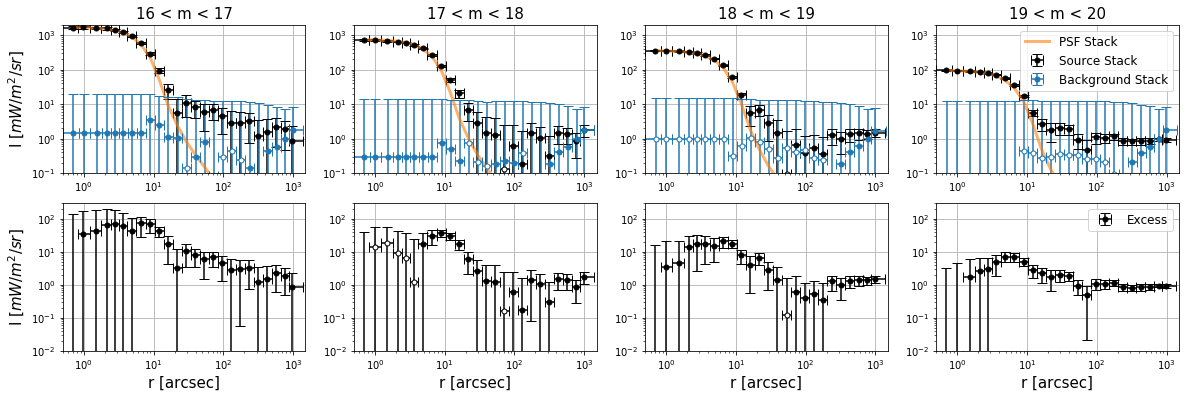

In [2]:
for ifield in [4]:
    for inst in [1]:
#         plt.close()
        fig, ax = plt.subplots(2, 4, figsize = (20,6))
        for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
            stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True, BGsub=False).stackdat
            plot_err_log(stackdat['rbins'], 
                         stackdat['profcb'],
                         np.sqrt(np.diag(stackdat['cov']['profcb'])),
                         ax=ax[0][im], color='k',label='Source Stack')
            ax[0][im].loglog(stackdat['rbins'],stackdat['PSF']['profcb'],
                          'C1', alpha=0.6, lw=3, label='PSF Stack')
            plot_err_log(stackdat['rbins']*1.01, 
                         stackdat['BG']['profcb'],
                         np.sqrt(np.diag(stackdat['BGcov']['profcb'])),
                         ax=ax[0][im], color='C0', label='Background Stack')
            ax[0][im].set_ylim([1e-1,2e3])
            ax[0][im].set_xlim([5e-1,1.5e3])
            ax[0][im].grid()    
            ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)

            plot_err_log(stackdat['rbins'], 
                         stackdat['ex']['profcb'],
                         np.sqrt(np.diag(stackdat['excov']['profcb'])),
                         ax=ax[1][im], color='k',label='Excess')
            ax[1][im].set_ylim([1e-2,3e2])
            ax[1][im].set_xlim([5e-1,1.5e3])
            ax[1][im].grid()    
            ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

        ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
        ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
        ax[0][-1].legend(fontsize=12)
        ax[1][-1].legend(fontsize=12)

#         plt.savefig('plots/paperfig/profile_TM%d_%s.png'%(inst, fieldnamedict[ifield]),
#                     dpi = 200, bbox_inches='tight')

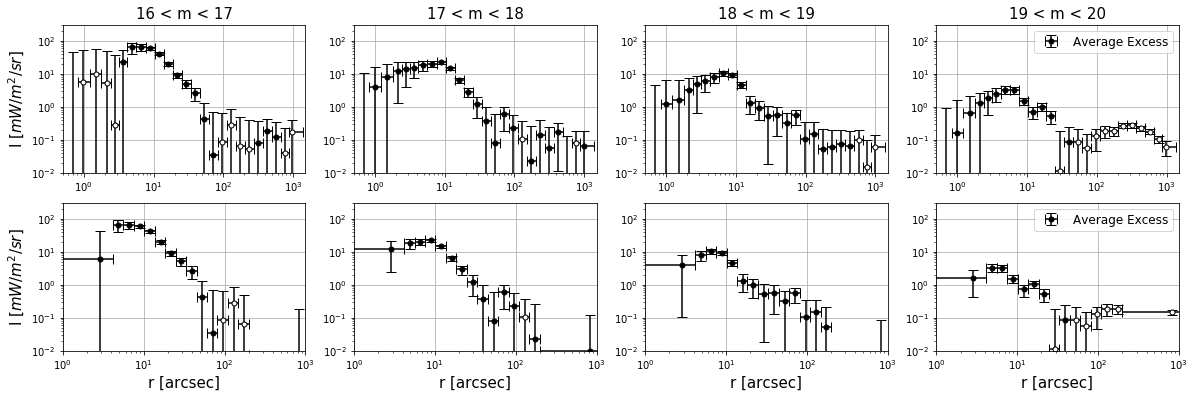

In [3]:
for inst in [1]:
    plt.close()
    fig, ax = plt.subplots(2, 4, figsize = (20,6))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        profd_arr, profd_err = 0, 0
        profdsub_arr, profdsub_err = 0, 0
        for ifield in [4,5,6,7,8]:
            stackdat = stacking(inst, ifield, m_min, m_max, 
                                load_from_file=True,BGsub=False).stackdat
            profd_arri = stackdat['ex']['profcb']
            profd_erri = np.sqrt(np.diag(stackdat['excov']['profcb']))
            profd_arr += profd_arri / profd_erri**2
            profd_err += 1 / profd_erri**2
            profdsub_arri = stackdat['ex']['profcbsub']
            profdsub_erri = np.sqrt(np.diag(stackdat['excov']['profcbsub']))
            profdsub_arr += profdsub_arri / profdsub_erri**2
            profdsub_err += 1 / profdsub_erri**2

        profd_arr /= profd_err
        profd_err = np.sqrt(1 / profd_err)
        profdsub_arr /= profdsub_err
        profdsub_err = np.sqrt(1 / profdsub_err)

        plot_err_log(stackdat['rbins'], 
                 profd_arr,profd_err,
                 ax=ax[0][im], color='k',label='Average Excess')
        plot_err_log(stackdat['rsubbins'], 
                 profdsub_arr,profdsub_err,
                 xedges = stackdat['rsubbinedges'],
                 ax=ax[1][im], color='k',label='Average Excess')

        ax[0][im].set_ylim([1e-2,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        ax[1][im].set_ylim([1e-2,3e2])
        ax[1][im].set_xlim([1e0,1e3])
        ax[1][im].grid()    
        ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][-1].legend(fontsize=12)
    ax[1][-1].legend(fontsize=12)

#     plt.savefig('/Users/ytcheng/Desktop/profile_TM%d.png'%(inst),
#                 dpi = 200, bbox_inches='tight')